In [3]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
from seminartools.models.four_quarter_average_model import FourQuarterAverageModel
from seminartools.data import read_merged
from seminartools.data import read_inflation

In [75]:
df_inflation = read_inflation()
df_inflation

,Country Code,IMF Country Code,Country,yearmonth,inflation
23311,PRT,182,Portugal,1970-04-01,0.000000
21697,NZL,196,New Zealand,1970-04-01,0.015421
7708,DOM,243,Dominican Republic,1970-04-01,-0.001604
9062,FIN,172,Finland,1970-04-01,0.008333
13232,IRL,178,Ireland,1970-04-01,0.029871
...,...,...,...,...,...
4821,CAN,156,Canada,2023-01-01,0.006080
26740,SWE,144,Sweden,2023-01-01,0.014955
16098,KOR,542,"Korea, Rep.",2023-01-01,0.010538
10308,GBR,112,United Kingdom,2023-01-01,0.008814


# 1. Read data

In [50]:
df_merged = read_merged().reset_index()
df_merged

,country,date,inflation,gdp_growth,interest_rate,unemployment_rate,commodity_CRUDE_PETRO,commodity_iNATGAS,commodity_iAGRICULTURE,commodity_iMETMIN,commodity_iPRECIOUSMET
0,Japan,1977-01-01,0.022951,2.187257,6.333333,2.3,0.00000,0.052425,0.144757,0.041940,0.112740
1,Canada,1977-01-01,0.023904,1.533830,8.166667,8.8,0.00000,0.052425,0.144757,0.041940,0.112740
2,United States,1977-01-01,0.017231,1.186233,4.700000,8.2,0.00000,0.052425,0.144757,0.041940,0.112740
3,Japan,1977-04-01,0.027244,0.703788,5.000000,2.0,-0.00400,0.043586,-0.066688,-0.045412,-0.060029
4,Canada,1977-04-01,0.023346,0.510302,7.666667,8.0,-0.00400,0.043586,-0.066688,-0.045412,-0.060029
...,...,...,...,...,...,...,...,...,...,...,...
2166,Italy,2023-01-01,0.003938,0.552944,3.000000,8.3,-0.02041,-0.585458,0.002037,0.007418,0.043183
2167,Canada,2023-01-01,0.006080,0.610026,4.500000,5.4,-0.02041,-0.585458,0.002037,0.007418,0.043183
2168,Sweden,2023-01-01,0.014955,0.656897,2.833333,7.8,-0.02041,-0.585458,0.002037,0.007418,0.043183
2169,Korea,2023-01-01,0.010538,0.329875,3.500000,3.2,-0.02041,-0.585458,0.002037,0.007418,0.043183


In [51]:
df_merged['country'].unique() 

array(['Japan', 'Canada', 'United States', 'Australia', 'New Zealand',
       'Switzerland', 'Italy', 'France', 'Portugal', 'Spain', 'Sweden',
       'Denmark', 'United Kingdom', 'Germany', 'Netherlands', 'Norway',
       'Belgium', 'Korea', 'South Africa', 'Türkiye'], dtype=object)

In [90]:
df = df_merged.pivot(index='date', columns='country', values='inflation')
df

country,Australia,Belgium,Canada,Denmark,France,Germany,Italy,Japan,Korea,Netherlands,New Zealand,Norway,Portugal,South Africa,Spain,Sweden,Switzerland,Türkiye,United Kingdom,United States
date,,,,,,,,,,,,,,,,,,,,
1977-01-01,NaN,NaN,0.023904,NaN,NaN,NaN,NaN,0.022951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.017231
1977-04-01,NaN,NaN,0.023346,NaN,NaN,NaN,NaN,0.027244,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.022022
1977-07-01,NaN,NaN,0.022814,NaN,NaN,NaN,NaN,0.003120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.014364
1977-10-01,NaN,NaN,0.018587,NaN,NaN,NaN,NaN,0.010886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.010893
1978-01-01,NaN,NaN,0.021898,NaN,NaN,NaN,NaN,0.004615,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.017241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-01,0.021295,0.033275,0.020211,0.021536,0.014870,0.018498,0.030160,0.006876,0.015388,0.029173,0.017820,0.007055,0.015094,0.014892,0.020852,0.016158,0.007859,NaN,NaN,0.022835
2022-04-01,0.017376,0.016949,0.031008,0.032997,0.022894,0.028500,0.018298,0.009756,0.020818,0.024764,0.016643,0.024113,0.050186,0.023478,0.032860,0.032686,0.015595,NaN,NaN,0.029738
2022-07-01,0.017933,0.025000,0.008354,0.023957,0.011638,0.016134,0.021563,0.010628,0.011352,0.040519,0.021527,0.022995,0.010619,0.027957,0.012038,0.030796,0.006718,NaN,NaN,0.013147


# 2. AR model per country

In [91]:
model = FourQuarterAverageModel()
model

In [92]:
from warnings import filterwarnings

filterwarnings('ignore')
model.fit(df_merged)

# 3. Evaluation

In [93]:
model.predict(df_merged)

,date,country,inflation
0,2023-04-01,Australia,0.017042
1,2023-04-01,Belgium,0.017316
2,2023-04-01,Canada,0.012779
3,2023-04-01,Denmark,0.017841
4,2023-04-01,France,0.014623
5,2023-04-01,Germany,0.019997
6,2023-04-01,Italy,0.021724
7,2023-04-01,Japan,0.009034
8,2023-04-01,Korea,0.011671
9,2023-04-01,Netherlands,0.016348


# 4. H-period ahead forecasting

In [94]:
from seminartools.models.utils import h_period_ahead_forecast

forecast = h_period_ahead_forecast(model, df_merged, "2020-01-01", h=3)
forecast

,date,country,inflation
0,2020-01-01,Australia,0.003384
1,2020-01-01,Belgium,0.003389
2,2020-01-01,Canada,0.007706
3,2020-01-01,Denmark,0.002561
4,2020-01-01,France,0.003632
...,...,...,...
255,2023-01-01,Sweden,0.021847
256,2023-01-01,Switzerland,0.009870
257,2023-01-01,Türkiye,NaN
258,2023-01-01,United Kingdom,NaN


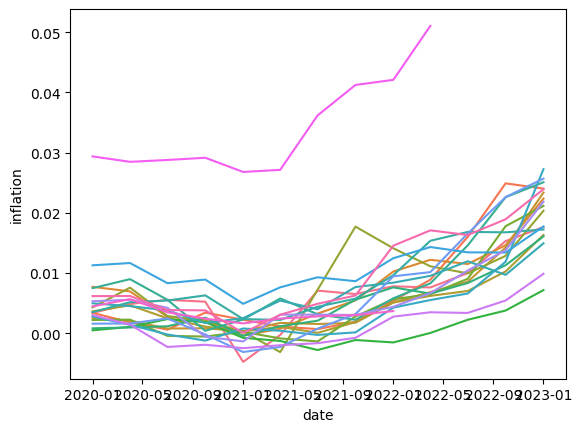

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(
    data = forecast,
    x = "date",
    y = "inflation",
    hue = "country"
)
# turn off legend
plt.legend().remove()

# 5. Compare the forecast with the actual data

In [96]:
forecast_merged = forecast.copy().rename(columns={"inflation": "pred", "date": "yearmonth", "country": "Country"})
forecast_merged = forecast_merged.merge(
    df_inflation[["Country", "yearmonth", "inflation"]],
    on=["Country", "yearmonth"],
    how="left",
).rename(columns={"inflation": "actual"})
forecast_merged.tail(100)


,yearmonth,Country,pred,actual
160,2022-01-01,Australia,0.007791,0.021295
161,2022-01-01,Belgium,0.005392,0.033275
162,2022-01-01,Canada,0.010246,0.020211
163,2022-01-01,Denmark,0.005132,0.021536
164,2022-01-01,France,0.005087,0.014870
...,...,...,...,...
255,2023-01-01,Sweden,0.021847,0.014955
256,2023-01-01,Switzerland,0.009870,0.010084
257,2023-01-01,Türkiye,NaN,NaN
258,2023-01-01,United Kingdom,NaN,0.008814


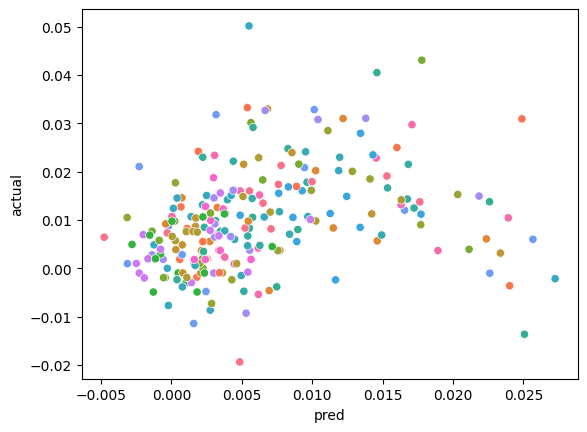

In [80]:
sns.scatterplot(
    data = forecast_merged,
    x = "pred",
    y = "actual",
    hue = "Country"
)
plt.legend().remove()

In [97]:
import statsmodels.api as sm

sm.OLS(
    forecast_merged["actual"], sm.add_constant(forecast_merged["pred"]), missing='drop'
).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 actual   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     20.53
Date:                Wed, 27 Mar 2024   Prob (F-statistic):           9.50e-06
Time:                        17:11:05   Log-Likelihood:                 728.43
No. Observations:                 229   AIC:                            -1453.
Df Residuals:                     227   BIC:                            -1446.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0069      0.001      7.500      0.000       0.005       0.009
pred           0.4579      0.101      4.531      0.000       0.259       0.657
==============================================================================
Omnibus:                       15.643   Durbin-Watson:                   1.160
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.514
Skew:                           0.433   Prob(JB):                     7.84e-06
Kurtosis:                       4.309   Cond. No.                         151.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""